## 🏦💸 Binary classification with bank dataset
The goal of this project is to predict whether a client would subscribe to a bank term deposit.

#### 1). Problem

To predict the likelihood of a client subscribing to a bank term deposit

#### 2). Data
The data is sourced from a kaggle competition: https://www.kaggle.com/competitions/playground-series-s5e8/overview

#### 3). Evaluation
The prediction would be evaluated on the ROC_AUC between the predicted values and the observed targets.

#### 4). Features
Some important features of the data includes:

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

In [5]:
# import the training dataset
df = pd.read_csv("train.csv")
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,0,1,2,3,4,5,6,7,8,9
age,42,38,36,27,26,24,39,50,46,39
job,technician,blue-collar,blue-collar,student,technician,admin.,blue-collar,admin.,blue-collar,management
marital,married,married,married,single,married,single,married,single,married,divorced
education,secondary,secondary,secondary,secondary,secondary,secondary,secondary,secondary,primary,tertiary
default,no,no,no,no,no,no,no,no,no,no
balance,7,514,602,34,889,1882,0,1595,1463,25
housing,no,no,yes,yes,yes,yes,no,no,no,yes
loan,no,no,no,no,no,no,no,no,no,no
contact,cellular,unknown,unknown,unknown,cellular,cellular,telephone,telephone,cellular,cellular


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [6]:
df.isna().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [29]:
df.y.value_counts()

y
0    659512
1     90488
Name: count, dtype: int64

In [8]:
df.pdays.value_counts()

pdays
-1      672434
 182      2515
 92       2275
 183      2074
 181      1698
         ...  
 759         1
 529         1
 794         1
 617         1
 376         1
Name: count, Length: 596, dtype: int64

In [11]:
df.job.value_counts()

job
management       175541
blue-collar      170498
technician       138107
admin.            81492
services          64209
retired           35185
self-employed     19020
entrepreneur      17718
unemployed        17634
housemaid         15912
student           11767
unknown            2917
Name: count, dtype: int64

In [9]:
df.previous.value_counts()

previous
0      672431
1       28342
2       20468
3       10326
4        6239
5        3882
6        2183
7        1730
8        1036
9         697
11        503
10        501
13        327
12        320
14        137
15        130
17        103
16         81
19         77
23         74
20         56
18         56
22         43
24         34
27         29
29         29
28         23
21         22
25         20
26         17
30         15
31          9
36          8
37          7
38          6
35          6
32          5
51          4
43          4
41          4
34          3
33          3
55          2
39          2
40          1
47          1
46          1
200         1
48          1
58          1
Name: count, dtype: int64

## Exploratory Data analysis
Using graphs and charts to draw insight from the datasets🏦

In [3]:
plt.style.use("ggplot")

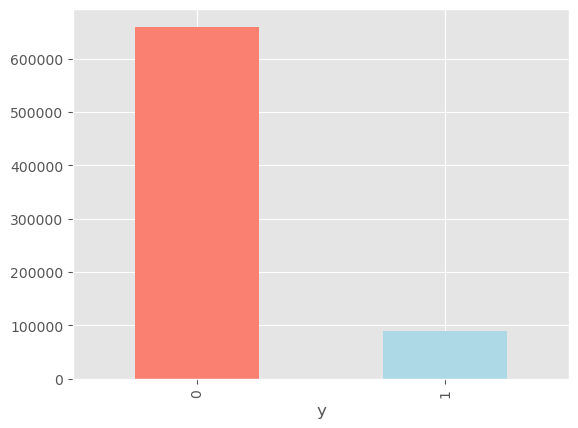

In [27]:
# Plot the target variable value counts using a bar graph
df.y.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

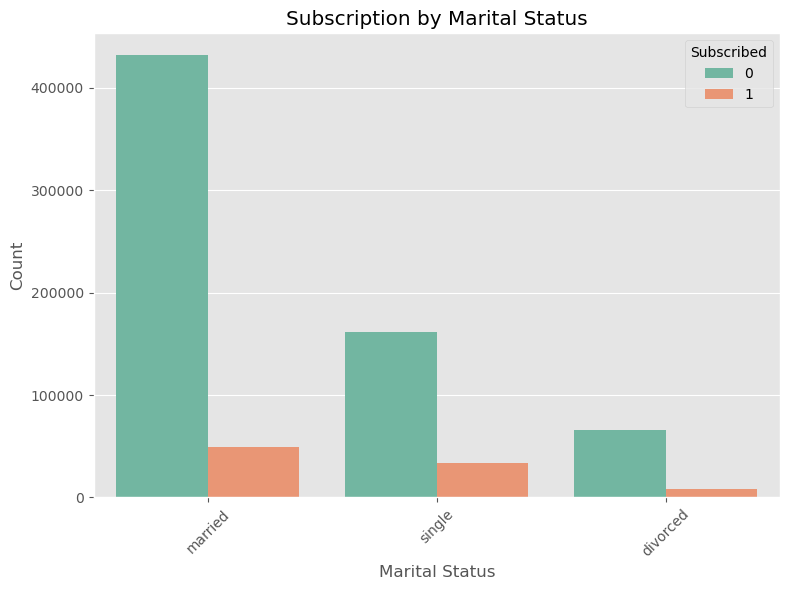

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='marital', hue='y', palette='Set2')
plt.title('Subscription by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Subscribed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# write a function to visualize the relationship between features and the target variable
def plot_graph(df, feature, target="y"):
    """Plot the categorical features against the target column"""
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=feature, hue=target, palette="Set2")
    plt.title(f"Subscription of {feature}")
    plt.xlabel(f"{feature}")
    plt.ylabel("Count")
    plt.legend(title="Subscribed")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

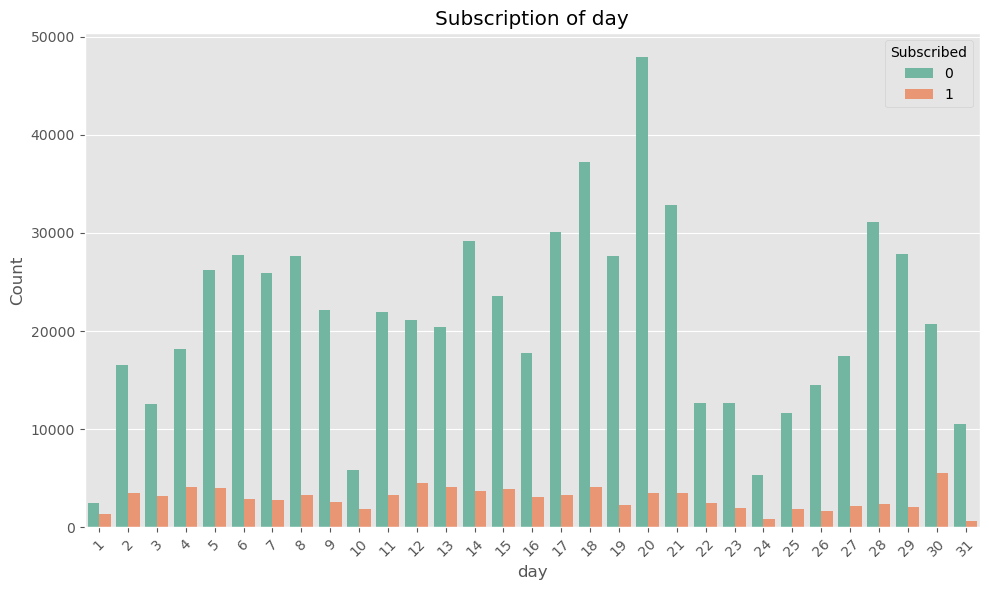

In [32]:
# Plot the Feature day to the target variable
plot_graph(df, feature="day")

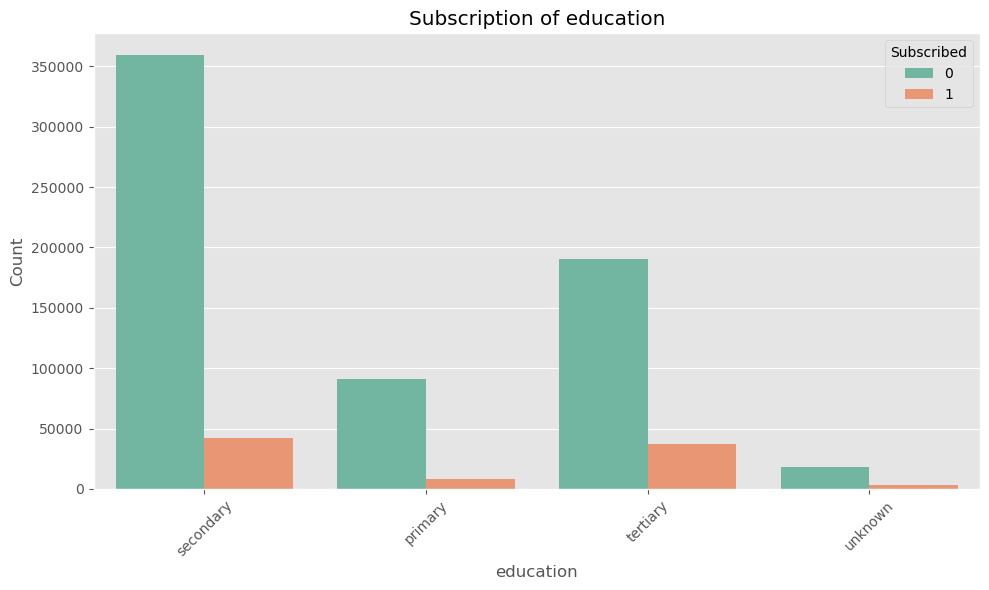

In [15]:
# Plot the Education feature against the targte variable
plot_graph(df, feature="education")

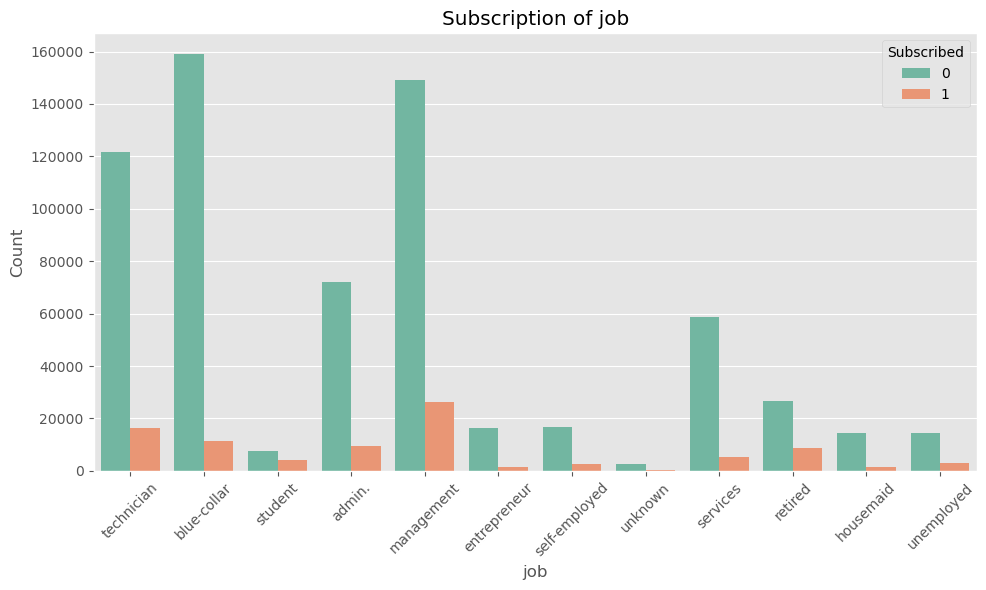

In [16]:
# Plot the job feature against the target variable
plot_graph(df, feature="job")

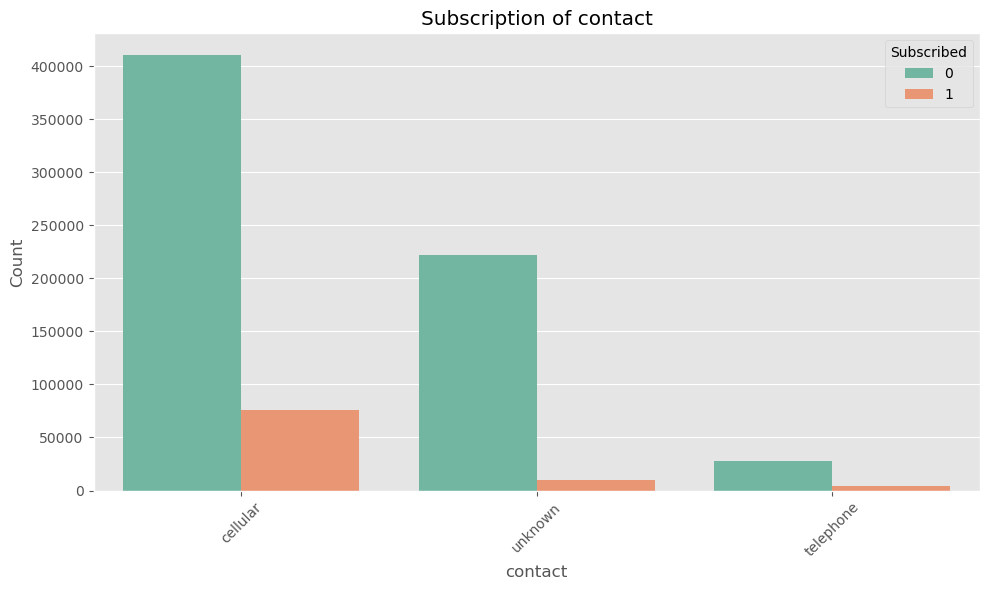

In [28]:
# Plot the communication type(contacts) against the target variable
plot_graph(df, feature="contact")

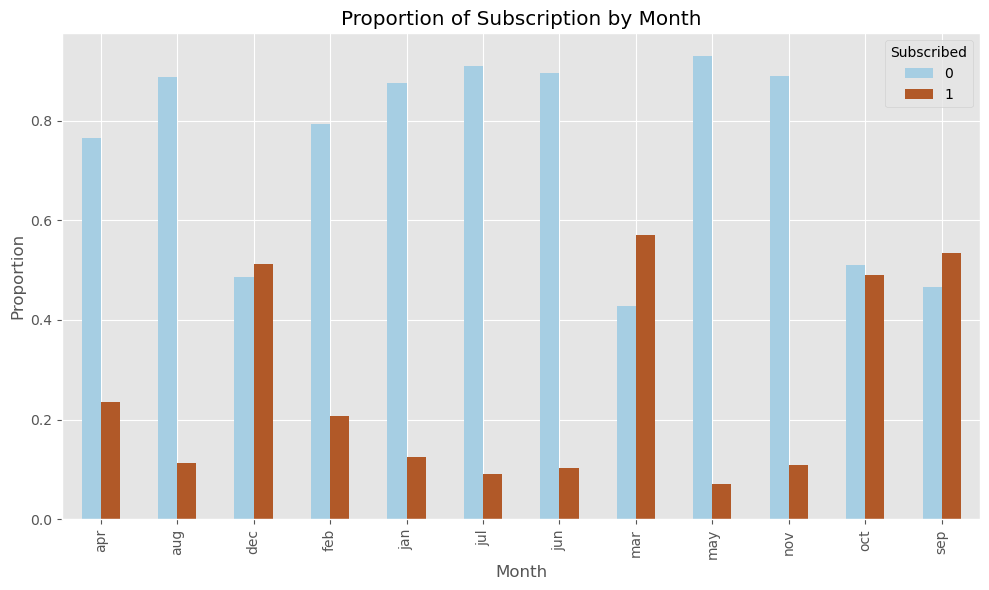

In [34]:
# Plot the month feature against the target variable
month_target = df.groupby('month')['y'].value_counts(normalize=True).unstack()
month_target.plot(kind='bar', figsize=(10, 6), colormap='Paired')
plt.title('Proportion of Subscription by Month')
plt.xlabel('Month')
plt.ylabel('Proportion')
plt.legend(title='Subscribed')
plt.tight_layout()
plt.show()

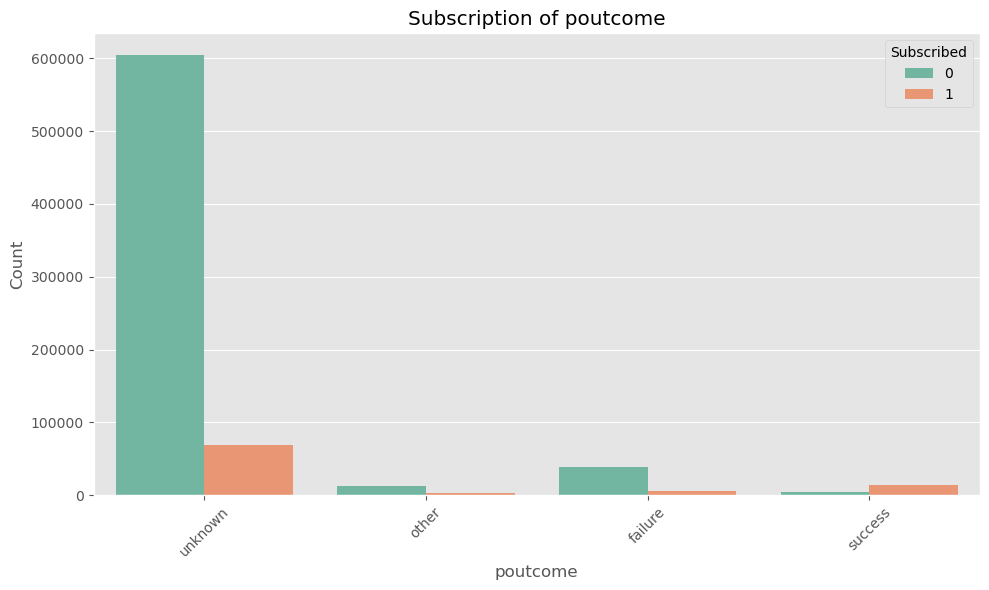

In [35]:
# Plot the outcome of the previous marketing campaign on the target variable
plot_graph(df, feature="poutcome")

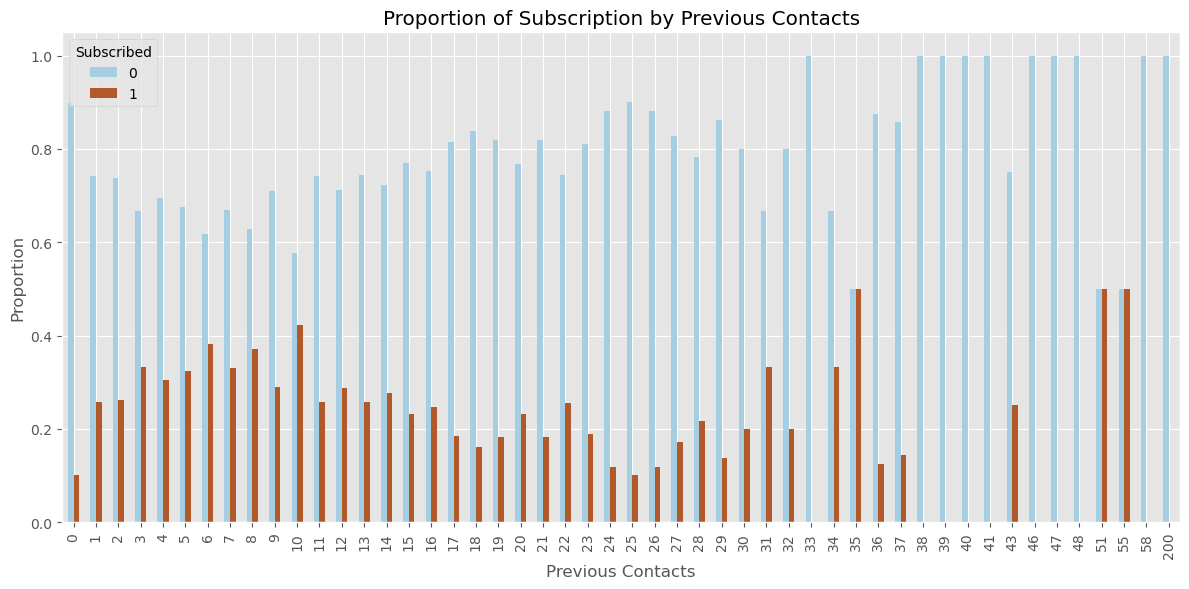

In [39]:
# Plot the previous successful contacts against the target variable 
prev_target = df.groupby('previous')['y'].value_counts(normalize=True).unstack()
prev_target.plot(kind='bar', figsize=(12, 6), colormap='Paired')
plt.title('Proportion of Subscription by Previous Contacts')
plt.xlabel('Previous Contacts')
plt.ylabel('Proportion')
plt.legend(title='Subscribed')
plt.tight_layout()
plt.show()

In [4]:
# Define balance bins
bins = [-10000, 0, 500, 1000, 5000, 10000, 50000, df['balance'].max()]
labels = ['<0', '0–500', '500–1k', '1k–5k', '5k–10k', '10k–50k', '>50k']

# Create a new column for balance range
df['balance_range'] = pd.cut(df['balance'], bins=bins, labels=labels)

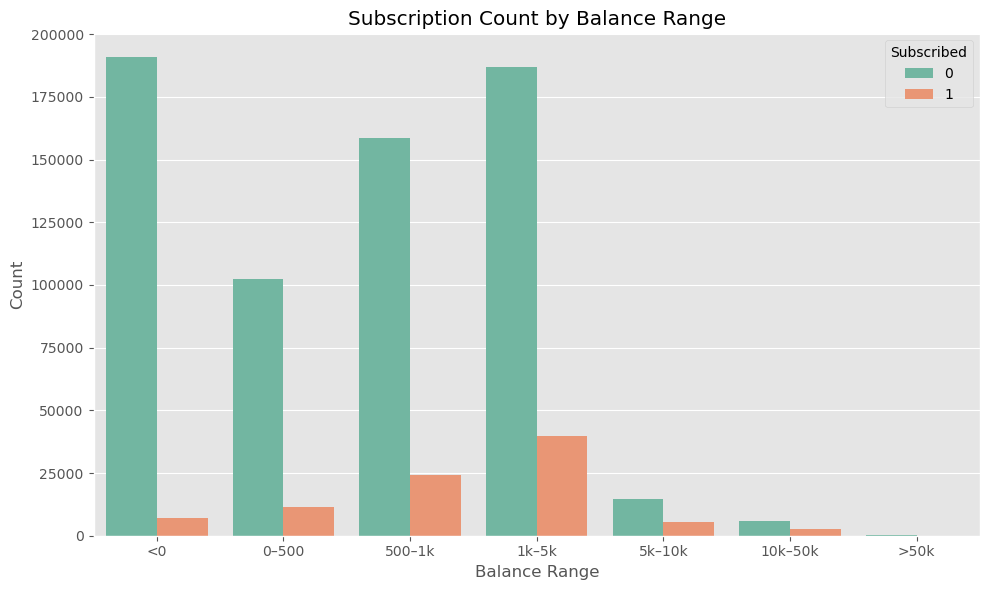

In [42]:
# Plot the balance of the clients against the target variable
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='balance_range', hue='y', palette='Set2')
plt.title('Subscription Count by Balance Range')
plt.xlabel('Balance Range')
plt.ylabel('Count')
plt.legend(title='Subscribed')
plt.tight_layout()
plt.show()

In [10]:
df.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
age,42,38,36,27,26,24,39,50,46,39,32,37,46,32,38
job,technician,blue-collar,blue-collar,student,technician,admin.,blue-collar,admin.,blue-collar,management,management,management,entrepreneur,blue-collar,blue-collar
marital,married,married,married,single,married,single,married,single,married,divorced,single,married,married,married,married
education,secondary,secondary,secondary,secondary,secondary,secondary,secondary,secondary,primary,tertiary,tertiary,tertiary,unknown,secondary,secondary
default,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
balance,7,514,602,34,889,1882,0,1595,1463,25,876,0,635,471,1686
housing,no,no,yes,yes,yes,yes,no,no,no,yes,yes,yes,no,yes,yes
loan,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
contact,cellular,unknown,unknown,unknown,cellular,cellular,telephone,telephone,cellular,cellular,cellular,cellular,unknown,unknown,unknown
day,25,18,14,28,3,20,21,31,4,8,5,24,11,12,26


## Data Preprocessing
We would have to convert the non-numerical data to numerical data so it can be processed by the model. The non-numerical features would need to be scaled so that each feature can influence the model equally.

In [6]:
# Drop the id column
df.drop(columns=["id"], inplace=True)

I would need to encode the non-numerical features of this data. 

Next step is to check the number of non-numerical features exist in this dataset

In [5]:
# Find the number of non-numerical features in the dataset
for label, content in df.items():
    if pd.api.types.is_string_dtype(content) or pd.api.types.is_object_dtype(content):
        print(label)

job
marital
education
default
housing
loan
contact
month
poutcome
balance_range


In [25]:
# Perform ordinal encoding on features with meaningful order
from sklearn.preprocessing import OrdinalEncoder

# Define ordered categories
education_order = ["unknown", "primary", "secondary", "tertiary"]
month_order = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
balance_order = ['<0', '0–500', '500–1k', '1k–5k', '5k–10k', '10k–50k', '>50k']

# Apply ordinal encoding
ordinal = OrdinalEncoder(categories=[education_order, month_order, balance_order])
df[["education", "month", "balance_range"]] = ordinal.fit_transform(df[["education", "month", "balance_range"]])

In [26]:
# Apply Binary encoding to the yes/no features
binary_map = {"yes": 1, "no": 0}
df["default"] = df["default"].map(binary_map)
df["housing"] = df["housing"].map(binary_map)
df["loan"] = df["loan"].map(binary_map)

In [27]:
# Apply one-hot encoding 
df = pd.get_dummies(df, columns=["job", "marital", "contact", "poutcome"], drop_first=True)

In [7]:
# Split the dataset into x and y variables
x = df.drop("y", axis=1)
y = df["y"]

In [29]:
# I would love to scale the data
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
x_scaled = scaler.fit_transform(x)

In [33]:
x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)

In [34]:
# Save the rpeprocessed dataframe
preprocessed_x = x_scaled_df.to_csv("Preprocessed data", index=False)

In [30]:
# Load preprocessed dataframe
Processed_df = pd.read_csv("Preprocessed data")
Processed_df.head().T

,0,1,2,3,4
age,0.200000,-0.066667,-0.200000,-0.800000,-0.866667
education,0.000000,0.000000,0.000000,0.000000,0.000000
default,0.000000,0.000000,0.000000,0.000000,0.000000
balance,-0.451079,-0.086331,-0.023022,-0.431655,0.183453
housing,-1.000000,-1.000000,0.000000,0.000000,0.000000
loan,0.000000,0.000000,0.000000,0.000000,0.000000
day,0.666667,0.083333,-0.250000,0.916667,-1.166667
month,0.666667,0.000000,-0.333333,-0.333333,-1.333333
duration,-0.059259,0.192593,-0.081481,-0.455556,2.848148
campaign,0.500000,-0.500000,0.000000,0.000000,-0.500000


## Model Driven exploratory data analysis
We would begin by selecting a model to fit our dataset on. There are couple of models that could do well on this dataset. We would select 3 of them and fit the data on it. We'll then  pick the best from the 3.
- `RandomForestClassifier()`
- `XGBoost()`
- `LogisticRegression()`

In [5]:
# !pip install xgboost

In [9]:
# Import the models to be used
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import f1_score, roc_auc_score, make_scorer

Our model has over 750,000 rows...woah..... That would take a lot of time to run and we don't want to waste time between experiments. We would create a new x and y variable with the first 100,000 rows so that we don't spend so much time between experiments

In [31]:
x_scaled_100k = Processed_df.iloc[:100000]
y_100k = y.iloc[:100000]

In [11]:
# Dictionary of models to be tested
from sklearn.model_selection import cross_val_score, StratifiedKFold
Models = {"RandomForestClassifier": RandomForestClassifier(),
         "LogisticRegression": LogisticRegression(max_iter=100),
         "XGBoost": xgb.XGBClassifier(),
         "XGBoostRF": xgb.XGBRFClassifier()}

def fit_and_score(models, x, y):
    """Fits and Score the models using cross validation"""
    np.random.seed(42)
    # Make a dictionary to keep the model
    Model_scores = {}
    # loop through model
    for name, model in models.items():
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        Model_scores[name] = cross_val_score(model, x, y, cv=cv, scoring="roc_auc").mean()
    return Model_scores

In [12]:
model_scores = fit_and_score(Models, x_scaled_100k, y_100k)
model_scores

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

{'RandomForestClassifier': 0.9564000384256438,
 'LogisticRegression': 0.9318990613661482,
 'XGBoost': 0.9611901726886444,
 'XGBoostRF': 0.9430088521053988}

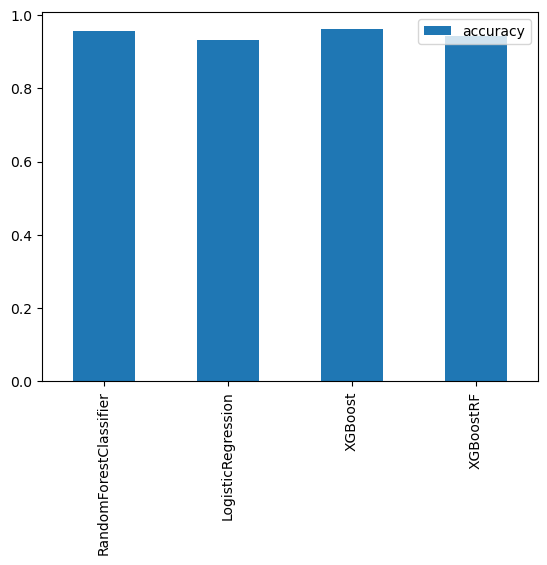

In [13]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

From the exercice performed above, we see that xgboost is the best performing model. We could consider trying out the `RandomForestClassifier` seeing it came out second best.

We would now begin tuning our models to produce a better `ROC_AUC_SCORE`

In [14]:
# Using XGBoost
model = xgb.XGBClassifier()
# Using cross_val_score
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
roc_auc = cross_val_score(model, x_scaled_100k, y_100k, cv=cv, scoring='roc_auc')
print("Mean ROC AUC:", roc_auc.mean())

Mean ROC AUC: 0.9611901726886444


Let's do the same for our second best performing model `RandomForestClassifier`

In [18]:
# Using RandomForestClassifier
rf_model = RandomForestClassifier()
# using cross_val_score
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
roc_auc_scores = cross_val_score(rf_model, x_scaled_100k, y_100k, cv=cv, scoring="roc_auc")
# Display Results
print("Mean ROC AUC: ", roc_auc_scores.mean())

Mean ROC AUC:  0.9561377391852842


### Hyperparameter Tuning

In [20]:
# Lets begin with the Xgboost using RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

In [23]:
# Import model
XGB_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator= XGB_model,
    param_distributions=param_grid,
    n_iter=50,
    scoring="roc_auc",
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
random_search.fit(x_scaled_100k, y_100k)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:16:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


CPU times: total: 58.3 s
Wall time: 26min 39s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.3, 0.5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 300, 500],
                                        'reg_alpha': [0, 0.1, 0.5],
                                        'reg_lambda': [1, 1.5, 2],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [24]:
print("Best ROC AUC Score: ", random_search.best_score_)
print("Best Parameters: ", random_search.best_params_)

Best ROC AUC Score:  0.9634938695385413
Best Parameters:  {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}


Let's tune the hyperparameter of our second model which is the RandomForestClassifier and see if it would perform better after hyperparameter tuning

In [11]:
rf_param_grid = {"n_estimators": [100, 300, 500, 800],
                "max_depth": [None, 10, 20, 30, 50],
                "min_samples_split": [2, 5, 10],
                "min_samples_leaf": [1, 2, 4],
                "max_features": ["auto", "sqrt", "log2"],
                "bootstrap": [True, False]
                }

In [ ]:
%%time

# Initialize the model
rfc_model = RandomForestClassifier(random_state=42)
# Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Set up RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=rfc_model,
    param_distributions=rf_param_grid,
    n_iter=50,
    scoring="f1_weighted",
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
# Fit the model
rf_random_search.fit(x_scaled_100k, y_100k)
# Display best Results
print("Best F1 Score: ", rf_random_search.best_score_)
print("Best Parameters:", rf_random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


I would then apply BalancedBaggedClassifier to the RandomForest Model

In [18]:
!pip install imbalanced-learn

In [42]:
%%time
# Import the libraries
from imblearn.ensemble import BalancedBaggingClassifier

x_50k = Processed_df.iloc[:50000]
y_50k = y.iloc[:50000]

# Initialize the base model
base_rf = RandomForestClassifier(n_estimators=800,
                                 min_samples_split=10,
                                 min_samples_leaf=2,
                                 max_features="sqrt",
                                 max_depth=30,
                                 bootstrap=False,
                                random_state=42,
                                n_jobs=2)
# Wrap it with BalancedBaggedClassifier
balanced_bagged_rf = BalancedBaggingClassifier(
    estimator=base_rf,
    sampling_strategy="auto",
    n_estimators=10,
    random_state=42,
    n_jobs=1
)
# Fit using cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(balanced_bagged_rf, x_50k, y_50k, cv=cv, scoring="roc_auc")

print(f"Mean ROC AUC: {scores.mean():.4f}")

Mean ROC AUC: 0.9525
CPU times: total: 34min 21s
Wall time: 22min 26s


In [11]:
%%time
# Import the libraries
from imblearn.ensemble import BalancedBaggingClassifier

x_50k = Processed_df.iloc[:50000]
y_50k = y.iloc[:50000]

# Initialize the base model
base_rf1 = RandomForestClassifier(n_estimators=800,
                                 min_samples_split=10,
                                 min_samples_leaf=2,
                                 max_features="sqrt",
                                 max_depth=30,
                                 bootstrap=False,
                                random_state=42,
                                n_jobs=2)
# Wrap it with BalancedBaggedClassifier
balanced_bagged_rf1 = BalancedBaggingClassifier(
    estimator=base_rf1,
    sampling_strategy="auto",
    n_estimators=10,
    random_state=42,
    n_jobs=1
)
# Fit using cross validation with f1 scoring
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(balanced_bagged_rf1, x_50k, y_50k, cv=cv, scoring="f1_weighted")

print(f"Mean f1 score: {scores.mean():.4f}")

Mean f1 score: 0.8878
CPU times: total: 31min 12s
Wall time: 18min 40s


### Threshold Moving

Threshold Moving is a technique used to fine-tune a classification model when dealing with imbalanced datasets. Instead of sticking with the default probability threshold of 0.5 to decide class labels. 

We would carry it out using `cross validation`.

In [15]:
TM_model = xgb.XGBClassifier(subsample=0.8, 
                             reg_lambda=1, 
                             reg_alpha=0.1,
                             n_estimators=500,
                             max_depth=7,
                             learning_rate=0.05, 
                             gamma=0,
                             colsample_bytree=0.8)
x = np.asarray(x_scaled_100k)
y = np.asarray(y_100k)

cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Store out of fold predictions
oof_preds = np.zeros_like(y, dtype=float)

for train_idx, val_idx in cv.split(x, y):
    x_train, x_val = x[train_idx], x[val_idx]
    y_train = y[train_idx]

    TM_model.fit(x_train, y_train)
    oof_preds[val_idx] = TM_model.predict_proba(x_val)[:, 1]

# Evaluate thresholds
thresholds = np.arange(0.1, 0.9, 0.01)
f1_scores = [f1_score(y, (oof_preds >= t).astype(int)) for t in thresholds]

optimal_threshold = thresholds[np.argmax(f1_scores)]
print(f"Optimal Threshold: {optimal_threshold:.2f}")
print(f"Best F1 at optimal threshold: {max(f1_scores):.4f}")

Optimal Threshold: 0.37
Best F1 at optimal threshold: 0.7256


In [16]:
# Threshold moving of the RandomForestClassifier
x = np.asarray(x_scaled_100k)
y = np.asarray(y_100k)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Store out of fold prediction
oof_preds = np.zeros_like(y, dtype=float)

for train_idx, val_idx in cv.split(x, y):
    x_train, x_val = x[train_idx], x[val_idx]
    y_train = y[train_idx]

    balanced_bagged_rf1.fit(x_train, y_train)
    oof_preds[val_idx] = balanced_bagged_rf1.predict_proba(x_val)[:, 1]

# Evaluate thresholds
thresholds = np.arange(0.1, 0.9, 0.01)
f1_scores = [f1_score(y, (oof_preds >= t).astype(int)) for t in thresholds]

optimal_thresholds = thresholds[np.argmax(f1_scores)]
print(f"Optimal Thresholds: {optimal_thresholds:.2f}")
print(f"Best F1 at Optimal threshold: {max(f1_scores):.4f}")

Optimal Thresholds: 0.71
Best F1 at Optimal threshold: 0.6962


It's time to fit the model on the full dataset

In [13]:
x_full = Processed_df
y_full = y

In [24]:
# Instantiate your model
final_model = xgb.XGBClassifier(
    subsample=0.8,
    reg_lambda=1,
    reg_alpha=0.1,
    n_estimators=500,
    max_depth=7,
    learning_rate=0.05,
    gamma=0,
    colsample_bytree=0.8,
    random_state=42
)

# fit on the full preprocessed dataset
final_model.fit(x_full, y_full)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [25]:
# Get prediction probabilities
full_probs = final_model.predict_proba(x_full)[:, 1]

# Apply threshold of 0.37
final_preds = (full_probs >= 0.37).astype(int)

In [26]:
from sklearn.metrics import confusion_matrix

print("F1 Score:", f1_score(y, final_preds))
print("Confusion Matrix:\n", confusion_matrix(y, final_preds))

F1 Score: 0.7554811365182356
Confusion Matrix:
 [[631080  28432]
 [ 18298  72190]]


In [18]:
# Get Prediction Probabilities
full_probs_rf1 = balanced_bagged_rf1.predict_proba(x_full)[:, 1]

# Apply threshold of 0.71
final_preds_rf1 = (full_probs_rf1 >= 0.71).astype(int)

In [19]:
from sklearn.metrics import confusion_matrix

print("F1 Score:", f1_score(y_full, final_preds_rf1))
print("Confusion Matrix:", confusion_matrix(y_full, final_preds_rf1))

F1 Score: 0.0
Confusion Matrix: [[659512      0]
 [ 90488      0]]


## Deploy the model on the testdata set


In [38]:
test_df = pd.read_csv("test.csv")
test_df.head().T

,0,1,2,3,4
id,750000,750001,750002,750003,750004
age,32,44,36,58,28
job,blue-collar,management,self-employed,blue-collar,technician
marital,married,married,married,married,single
education,secondary,tertiary,primary,secondary,secondary
default,no,no,no,no,no
balance,1397,23,46,-1380,1950
housing,yes,yes,yes,yes,yes
loan,no,no,yes,yes,no
contact,unknown,cellular,cellular,unknown,cellular


In [35]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                250000 non-null  int64  
 1   education          250000 non-null  float64
 2   default            250000 non-null  int64  
 3   balance            250000 non-null  int64  
 4   housing            250000 non-null  int64  
 5   loan               250000 non-null  int64  
 6   day                250000 non-null  int64  
 7   month              250000 non-null  float64
 8   duration           250000 non-null  int64  
 9   campaign           250000 non-null  int64  
 10  pdays              250000 non-null  int64  
 11  previous           250000 non-null  int64  
 12  balance_range      250000 non-null  float64
 13  job_blue-collar    250000 non-null  bool   
 14  job_entrepreneur   250000 non-null  bool   
 15  job_housemaid      250000 non-null  bool   
 16  jo

Begin to preprocess the test data the same way the training data was processed.

In [39]:
# store the ID column seperately
ID = test_df["id"]
ID

0         750000
1         750001
2         750002
3         750003
4         750004
           ...  
249995    999995
249996    999996
249997    999997
249998    999998
249999    999999
Name: id, Length: 250000, dtype: int64

In [21]:
# drop the id column
test_df.drop(columns=["id"], inplace=True)

In [22]:
# Define balance bins
bins = [-10000, 0, 500, 1000, 5000, 10000, 50000, test_df['balance'].max()]
labels = ['<0', '0–500', '500–1k', '1k–5k', '5k–10k', '10k–50k', '>50k']

# Create a new column for balance range
test_df['balance_range'] = pd.cut(test_df['balance'], bins=bins, labels=labels)

In [23]:
# Perform ordinal encoding on features with meaningful order
from sklearn.preprocessing import OrdinalEncoder

# Define ordered categories
education_order = ["unknown", "primary", "secondary", "tertiary"]
month_order = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
balance_order = ['<0', '0–500', '500–1k', '1k–5k', '5k–10k', '10k–50k', '>50k']

# Apply ordinal encoding
ordinal = OrdinalEncoder(categories=[education_order, month_order, balance_order])
test_df[["education", "month", "balance_range"]] = ordinal.fit_transform(test_df[["education", "month", "balance_range"]])

In [24]:
# Apply Binary encoding to the yes/no features
binary_map = {"yes": 1, "no": 0}
test_df["default"] = test_df["default"].map(binary_map)
test_df["housing"] = test_df["housing"].map(binary_map)
test_df["loan"] = test_df["loan"].map(binary_map)

In [25]:
# Apply one-hot encoding 
test_df = pd.get_dummies(test_df, columns=["job", "marital", "contact", "poutcome"], drop_first=True)

In [26]:
# Scale the encoded test data
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
x_scaled = scaler.fit_transform(test_df)

In [33]:
# Convert x_scaled to a DataFrame if it's still a NumPy array
x_scaled_test_df = pd.DataFrame(x_scaled, columns=test_df.columns)

# Step 1: Get column names
train_columns = x_full.columns
test_columns = x_scaled_test_df.columns

# Step 2: Compare sets of columns
missing_in_test = set(train_columns) - set(test_columns)
extra_in_test = set(test_columns) - set(train_columns)

# Step 3: Print results
print("✅ Columns in train but missing in test:", missing_in_test)
print("⚠️ Columns in test but not in train:", extra_in_test)

# Optional: Check if columns match exactly and in the same order
print("🔍 Columns match exactly:", list(train_columns) == list(test_columns))

✅ Columns in train but missing in test: set()
⚠️ Columns in test but not in train: set()
🔍 Columns match exactly: True


In [37]:
# Predict probabilities for the positive class
test_probs = final_model.predict_proba(x_scaled)[:, 1]

# Apply the optimal threshold
test_preds = (test_probs >= 0.37).astype(int)

C:\Users\user\AppData\Local\Temp\ipykernel_72\792999064.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2')


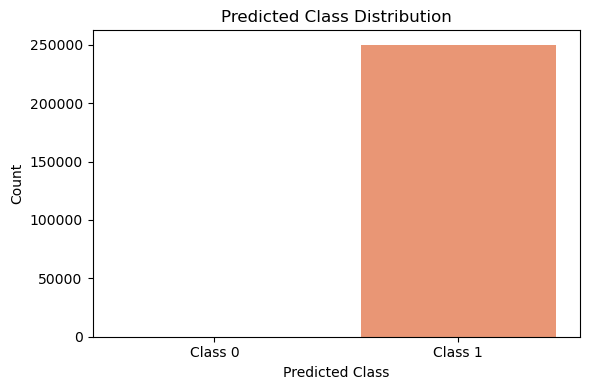

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Count predicted labels
class_counts = pd.Series(test_preds).value_counts().sort_index()

# Plot with Seaborn
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2')
plt.title('Predicted Class Distribution')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.tight_layout()
plt.show()

In [38]:
# Create a DataFrame for submission
submission = pd.DataFrame({
    "id": ID,
    "y": test_preds
})

# Save to CSV
submission.to_csv("submission.csv", index=False)

In [40]:
check = pd.read_csv("submission.csv")
check.head(30)

,id,y
0,750000,1
1,750001,1
2,750002,1
3,750003,1
4,750004,1
5,750005,1
6,750006,1
7,750007,1
8,750008,1
9,750009,1


In [27]:
# Predict probabilities for the positive class
test_probs_rf1 = balanced_bagged_rf1.predict_proba(x_scaled)[:, 1]

# Apply the optimal threshold
test_preds = (test_probs_rf1 >= 0.37).astype(int)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BalancedBaggingClassifier was fitted with feature names
  warnings.warn(


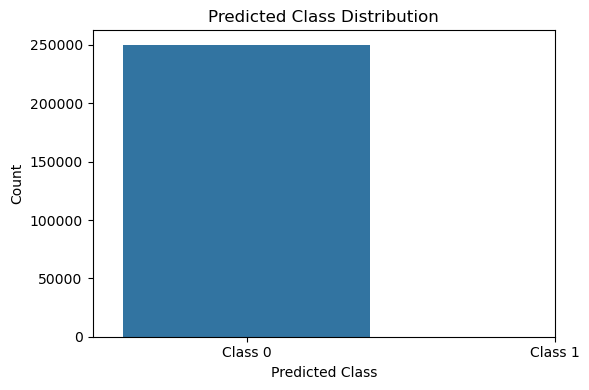

In [35]:
# Plot the predicted class distribution
class_counts = pd.Series(test_preds).value_counts().sort_index()

# Plot with seaborn
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Predicted Class Distribution')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.tight_layout()
plt.show()

In [40]:
# Create a DataFrame for submission
submission = pd.DataFrame({
    "id": ID,
    "y": test_preds
})

# Save to CSV
submission.to_csv("submission 1.csv", index=False)

In [41]:
check = pd.read_csv("submission 1.csv")
check.head(30)

,id,y
0,750000,0
1,750001,0
2,750002,0
3,750003,0
4,750004,0
5,750005,0
6,750006,0
7,750007,0
8,750008,0
9,750009,0
